# importing necessary library

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from datetime import datetime

In [2]:
# reading the dataset
data = pd.read_csv("E:\download E\d2.csv")
data.head()

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [3]:
data.shape # shape of the dataset

(3652, 2)

In [4]:
data.info() # info about the daata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Temp    3651 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


<AxesSubplot:>

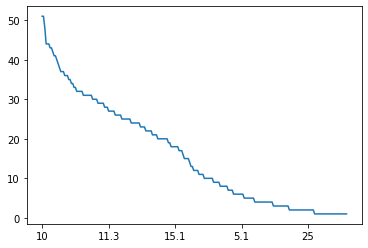

In [5]:
data['Temp'].value_counts().plot() 

<AxesSubplot:xlabel='Date'>

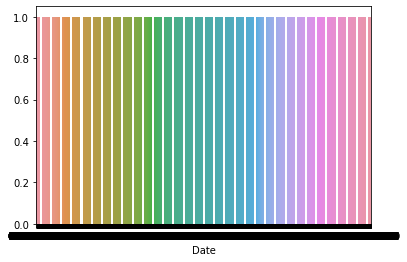

In [13]:
result = data.groupby(['Date']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)

In [14]:
data.isnull().values.sum() # checking null values

3

In [15]:
# printing the null values and colums
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1) 
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

     Date Temp
3650  NaN  NaN
3651  NaN     


In [16]:
data.dropna(subset = ["Date"], inplace=True) # dropping null values

In [17]:
data.dropna(subset = ["Temp"], inplace=True)

In [18]:
data.isnull().values.any() # rechecking null values

False

# converting the datatypes 

In [19]:
data['Date'] = pd.to_datetime(data['Date']) 

In [20]:
data[["Temp"]] = data[["Temp"]].apply(pd.to_numeric)


In [21]:
data = data.apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   int64  
 1   Temp    3650 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 85.5 KB


In [ ]:
data.plot( 'Date' , 'Temp')
plt.figure(figsize=(18,6))
# Alternatively, you can use .set_index 
# to set the data of each axis as follows:
# df_days_calories.set_index('day')['calories'].plot();

In [22]:
data['Temp'] = data['Temp'].astype(int)

In [23]:
# taking the first col as X
X = data[data.columns[:1]]
print(X.shape)
X

(3650, 1)


,Date
0,347155200000000000
1,349833600000000000
2,352252800000000000
3,354931200000000000
4,357523200000000000
...,...
3645,662256000000000000
3646,662342400000000000
3647,662428800000000000
3648,662515200000000000


In [24]:
# taking class label 
y = data['Temp']
print(y.shape)
y

(3650,)


0       20
1       17
2       18
3       14
4       15
        ..
3645    14
3646    13
3647    13
3648    15
3649    13
Name: Temp, Length: 3650, dtype: int32

# spliting of data in 80:20 ratio

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
reg = LinearRegression().fit(X, y) # fitting model

In [27]:
y_pred=reg.predict(X_test) # predicting the model

In [28]:
 reg.score(X, y) # printing score

0.00048252670730886127

# using RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [30]:
y_pred=rf.predict(X_test)# predicting the model

In [31]:
 rf.score(X, y) # printing score

0.18246575342465754